# DS3000: Final Project Report

##### Team: Abdulmalak Bin Ateeq, Ali Alyaqoub, Chia Hsu Tai, Daniel Xu

## Executive Summary

<p>Using the machine learning algorithms we've developed over the course of the past semester, our team sought to generate models capable of predicting both the outcome of a chess game and the skill of the players playing the game. </p>
<p>To do the former, our team used three classification algorithms, Logistic Regression, K-Nearest Neighbors, and Random Forest, to predict whether black or white would come out victorious. To do the latter, our team used a Linear Regression to estimate the ELO rating of black and white. By training our models with over a hundred thousand games each with information about the competitors, the game state, and more from an online chess database, we ended up with models that could do just that. </p>
<p>Our classification models experienced moderate success, with our best being able to predict the winner 87% of the time. Our linear regression on the other hand experienced immense failure, ending up with r2 scores below .20, meaning that our models could not reliably explain/predict the variance in ELO rating given its different independent variables. <p/>
<p>Nonetheless, here is our project, and we hope you enjoy. <p/>

## Introduction

[Chess](https://en.wikipedia.org/wiki/Chess) has been around for a millennia and a half; but in just the last two decades, chess has seen an explosion in knowledge and strategy, largely thanks to the implementation and advancement of chess AI's. It seemed ridiculous in the mid 19th century for a machine to beat the [best chess players](https://www.chess.com/article/view/deep-blue-kasparov-chess) in the world, but nowadays, those players would be happy to last more than 50 moves against an engine. By analyzing chess variant positions and picking the best move based on all possible outcomes, chess engines are capable of examining positions in excruciating detail and precision. And by experimenting with different types of [learning](https://www.chess.com/article/view/computer-chess-engines#neural-network-engine) like neural networks, reinforcement learning, and deep learning, chess engines are only becoming better and better.

What does that mean for us and our group project? Well, although we don't quite have the tools to make an unbeatable chess AI, we do have machine learning algorithms we can use to predict certain aspects about a chess game. This project aims to see how accurately we can predict two things based on some information about a game:

- the outcome
- the [ELO](https://www.chess.com/terms/elo-rating-chess) rating of both players

## Plan of Attack
For the first goal, our team planned to use three classifier techniques; KNN, Random Forest, and a Logistic Regression, to determine the outcome of a game, experimenting with multiple different models to see which would produce the best results.
For our second goal, our team used a linear regression model to predict the rating of both white and black.
By gathering a large number of chess games, each game holding various information about the game such as number of moves and material advantage, we set out on a machine learning adventure.

## Data Pipeline

The data from this project was taken from the [Lichess Website](https://database.lichess.org/). Lichess is an online free to play chess platform where people of all chess levels can play against each other. Lichess has a massive database of chessgames categorized by month and year. Each month of chessgames has upwards of 2.5 million games with each game standardized in PGN notation. For this project, we chose to limit ourselves to a smaller dataset - May 2013 - to ensure that our computers could handle all of the computing. Below you can see the steps we took to clean the data for the classification and regression models. 

Below we have the method by which we extracted the PNG data from the Lichess file. The conversion process took nearly one hour. After the extraction was completed, we merged the extracted data into a single dataframe and saved the information to a CSV file.

In [1]:
from converter.pgn_data import PGNData

# Use pgn2data library to read in PGN file, outputs two different csv files
# One csv file holds information about the game
# Second has information about EVERY move from EVERY game

pgn_data = PGNData("lichess_may_2013.pgn")
result = pgn_data.export()
result.print_summary()

In [2]:
import pandas as pd

game_info_df = pd.read_csv('lichess_games_game_info.csv')
move_info_df = pd.read_csv('lichess_games_moves.csv')

# Drop all rows for each game other than the last (last move of the game)
move_info_df = move_info_df.drop_duplicates('game_id', keep='last')

# Merge dataframes
df_game = game_info_df.merge(move_info_df, on='game_id')

# Write dataframe to new csv_file
df_game.to_csv('lichess_games.csv')

##### Cleaning the Data:

In [1]:
%%capture
import pandas as pd

# load the data first dataset.
df_game = pd.read_csv('lichess_games.csv')

In [2]:
df_game.shape

(179550, 93)

In [3]:
df_game.head()

,Unnamed: 0,game_id,game_order,event,site,date_played,round,white,black,result,...,fen_row8_black_count,fen_row1_black_value,fen_row2_black_value,fen_row3_black_value,fen_row4_black_value,fen_row5_black_value,fen_row6_black_value,fen_row7_black_value,fen_row8_black_value,move_sequence
0,0,f7875eb1-e971-4565-98d0-40066be7dd23,1,Rated Bullet game,https://lichess.org/ri7h2cf8,????.??.??,?,JesusLovesYou,Azat,0-1,...,3,9,0,0,0,0,7,6,8,b3|e6|Bb2|Qe7|g4|g6|Bxh8|f6|g5|b6|gxf6|Nxf6|Bx...
1,1,3c359046-7fff-4a29-bd3e-5eee1a00a56f,2,Rated Blitz game,https://lichess.org/sub640sd,????.??.??,?,Sallakja,tamplier_47,0-1,...,0,0,0,3,0,5,1,2,0,e4|e5|Bc4|Bc5|Bxf7+|Kxf7|f4|g6|Nf3|exf4|d4|Bb4...
2,2,fd77390a-eebe-4fdc-9a03-5464b3312de4,3,Rated Bullet game,https://lichess.org/3y2jowcd,????.??.??,?,FCST1923,mementomori,0-1,...,4,9,0,0,0,0,4,6,13,d4|d5|e3|Nc6|Bb5|Nf6|Bxc6+|bxc6|f3|Bf5|e4|dxe4...
3,3,3bfb9b71-a061-425d-9a43-249c821348af,4,Rated Blitz game,https://lichess.org/labh1tx9,????.??.??,?,Boris_Z,Jacob135135,0-1,...,1,0,10,0,0,1,2,2,0,e4|c5|Nf3|d6|Nc3|Nc6|Bb5|Bd7|Bxc6|bxc6|d4|cxd4...
4,4,ef66fedb-9dd4-41f7-a6ce-ed53abd3b232,5,Rated Classical game,https://lichess.org/rffwxw46,????.??.??,?,isaacnewton14,elf,1-0,...,2,0,3,0,0,8,8,0,5,e4|e5|Nf3|Nc6|Bb5|Nge7|d4|a6|Ba4|b5|Bb3|exd4|N...


The cleaning process will be divided into 3 parts: removing rows that have missing data, modifying the dataframe in order to reduce redundancy, and removing redundant or unwanted columns.

In [4]:
# get rows where ELO is recorded.
df_bool_black = df_game['black_elo'] != '?'
df_bool_white = df_game['white_elo'] != '?'

# We drop the games where the rating is unknown.
df_game = df_game[df_bool_black & df_bool_white]

In [5]:
df_game.shape

(179207, 93)

In [6]:
# get the outcomes of a match from the dataframe.
winner = df_game.loc[:, ['white', 'black', 'winner']]
winner_list = []

# add ternary representation of outcome
for index, row in winner.iterrows():
    
    # 0: draw, 1: win, 2: loss
    if row['winner'] == 'draw':
        winner_list.append(0)
        
    elif row['winner'] == row['white']:
        winner_list.append(1)
        
    else:
        winner_list.append(2)

# add the outcomes to the dataframe. 
df_game['winner_ternary'] = winner_list

In [7]:
df_game['winner_ternary'][:5]

0    2
1    2
2    2
3    2
4    1
Name: winner_ternary, dtype: int64

In [8]:
# the event column has hidden links that need to be removed. 
game_type = list()

# clean the event column (removing links from names). 
for event in df_game['event']:
    game = event.split(' ')
    game_type.append(' '.join(game[:3]))
    
# add clean values to dataframe.
df_game['event_type'] = game_type

In [9]:
df_game['event_type'][:5]

0       Rated Bullet game
1        Rated Blitz game
2       Rated Bullet game
3        Rated Blitz game
4    Rated Classical game
Name: event_type, dtype: object

In [10]:
# columns to be dropped.
columns = ['Unnamed: 0', 'event', 'date_played', 'white_title',
           'black_title', 'utc_date','utc_time', 'date_created',
           'round', 'site', 'variant', 'ply_count', 'file_name',
           'game_id', 'game_order', 'time_control', 'loser_elo',
           'winner_elo', 'winner_loser_elo_diff', 'result',
           'loser', 'white', 'black', 'white_rating_diff',
           'black_rating_diff', 'winner', 'move_no_pair', 'player',
           'notation', 'move', 'from_square', 'to_square', 'piece',
           'color', 'fen', 'is_check', 'is_check_mate',
           'is_fifty_moves', 'is_fivefold_repetition', 'is_game_over',
           'is_insufficient_material', 'move_sequence',
           'move_no', 'white_count', 'black_count', 'white_pawn_count',
           'black_pawn_count', 'white_queen_count', 'black_queen_count',
           'white_black_count', 'black_bishop_count', 'white_knight_count',
           'black_knight_count', 'white_rook_count', 'black_rook_count']

df_game.drop(columns=columns, inplace=True, axis=1)

In [11]:
df_game.head()

,white_elo,black_elo,eco,termination,captured_score_for_white,captured_score_for_black,fen_row1_white_count,fen_row2_white_count,fen_row3_white_count,fen_row4_white_count,...,fen_row1_black_value,fen_row2_black_value,fen_row3_black_value,fen_row4_black_value,fen_row5_black_value,fen_row6_black_value,fen_row7_black_value,fen_row8_black_value,winner_ternary,event_type
0,1663,1635,A01,Normal,9,7,3,6,3,1,...,9,0,0,0,0,7,6,8,2,Rated Bullet game
1,1657,1644,C20,Time forfeit,28,28,2,1,2,1,...,0,0,3,0,5,1,2,0,2,Rated Blitz game
2,1178,1500,D00,Normal,7,25,1,2,3,1,...,9,0,0,0,0,4,6,13,2,Rated Bullet game
3,1572,1656,B50,Normal,24,23,3,1,3,2,...,0,10,0,0,1,2,2,0,2,Rated Blitz game
4,1269,1459,C60,Normal,15,18,2,3,1,0,...,0,3,0,0,8,8,0,5,1,Rated Classical game


For our classification models, we thought it would be best to remove games that ended in a draw. We also changed the winner labels to a string (black or white) in order to make the label more explicit. Black indicates that black won and white indicates that white won.

In [12]:
# get all the names where white or black wins.
df_bool_white = df_game['winner_ternary'] == 1
df_bool_black = df_game['winner_ternary'] == 2

# get all the games with no draws
df_g = df_game[df_bool_white | df_bool_black]

# rename the winning column.
df_g = df_g.rename(columns={'winner_ternary': 'winner_binary'})

In [13]:
df_g['winner_binary'].unique()

array([2, 1])

In [14]:
# replace the win and loss values.
map_win = {2: 'black', 1:'white'}
df_g['winner_binary'] = df_g['winner_binary'].replace(map_win)

In [15]:
df_g['winner_binary'].unique()

array(['black', 'white'], dtype=object)

In [16]:
df_g.head()

,white_elo,black_elo,eco,termination,captured_score_for_white,captured_score_for_black,fen_row1_white_count,fen_row2_white_count,fen_row3_white_count,fen_row4_white_count,...,fen_row1_black_value,fen_row2_black_value,fen_row3_black_value,fen_row4_black_value,fen_row5_black_value,fen_row6_black_value,fen_row7_black_value,fen_row8_black_value,winner_binary,event_type
0,1663,1635,A01,Normal,9,7,3,6,3,1,...,9,0,0,0,0,7,6,8,black,Rated Bullet game
1,1657,1644,C20,Time forfeit,28,28,2,1,2,1,...,0,0,3,0,5,1,2,0,black,Rated Blitz game
2,1178,1500,D00,Normal,7,25,1,2,3,1,...,9,0,0,0,0,4,6,13,black,Rated Bullet game
3,1572,1656,B50,Normal,24,23,3,1,3,2,...,0,10,0,0,1,2,2,0,black,Rated Blitz game
4,1269,1459,C60,Normal,15,18,2,3,1,0,...,0,3,0,0,8,8,0,5,white,Rated Classical game


The final step for our dataset was converting its categorical data into numerical data. The approach we took was to use [One-Hot encoding](https://www.educative.io/blog/one-hot-encoding).

In [17]:
# first we convert the categorical data into numerical data.
columns = ['event_type', 'termination', 'eco']
df_games = pd.get_dummies(df_g, columns=columns)

In [20]:
df_games.head()

,white_elo,black_elo,captured_score_for_white,captured_score_for_black,fen_row1_white_count,fen_row2_white_count,fen_row3_white_count,fen_row4_white_count,fen_row5_white_count,fen_row6_white_count,...,eco_E85,eco_E87,eco_E88,eco_E90,eco_E91,eco_E92,eco_E93,eco_E94,eco_E97,eco_E98
0,1663,1635,9,7,3,6,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1657,1644,28,28,2,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1178,1500,7,25,1,2,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1572,1656,24,23,3,1,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1269,1459,15,18,2,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Data Exploration and Visualizations

Join us as we venture on a journey through our data, stopping along the way to investigate trends, explore details, and create beautiful visualizations.

In [22]:
from collections import Counter

def get_top_20_openings(data, label):
    """Gets the top 20 most common openings from the given dataframe.

    Args:
        data (pd.DataFrame): dataframe where the openings can be found.
        label (str): name of the column where the opening names can be found.

    Returns:
        openings (list): a list containing the top 20 most common entries.
    """

    # we get the top 20 most common chess openings in the dataframe.
    openings = Counter(data[label])
    top_20 = openings.most_common(20)

    # get the names of the openings.
    openings_names = [i[0] for i in top_20]

    return openings_names

In [23]:
def filter_data(data, label, filter_list):
    """Gets all the rows where the value matches the filter. 

    Args:
        data (pd.DataFrame): dataframe that will be filtered.
        label (str): name of the column where from which you want to filter.
        filter_list (list): values that you are filtering by.

    Returns:
        df_clean (pd.DataFrame): filtered dataframe.
    """

    # get data at the given label and filter.
    df_bool = data[label].isin(filter_list)
    df_clean = data[df_bool]

    return df_clean

In [24]:
# get top 20 and filter the dataframe.
top_20 = get_top_20_openings(df_game, 'eco')
df_openings = filter_data(df_g, 'eco', top_20)

### Probability of winning across the most popular openings

For this visualization, we'll consider just the top 20 most popular openings from above. We’ll visualize the effectiveness of each opening (the percentage of those games that ended in white winning, black winning, and drawing) by creating a stacked bar chart - each opening shows the percentage of black wins, white wins, and draws. All the bars should add up to 100%.

In [25]:
# the cell above has the games where the top20 most common opennings were used.
df_openings.head()

,white_elo,black_elo,eco,termination,captured_score_for_white,captured_score_for_black,fen_row1_white_count,fen_row2_white_count,fen_row3_white_count,fen_row4_white_count,...,fen_row1_black_value,fen_row2_black_value,fen_row3_black_value,fen_row4_black_value,fen_row5_black_value,fen_row6_black_value,fen_row7_black_value,fen_row8_black_value,winner_binary,event_type
1,1657,1644,C20,Time forfeit,28,28,2,1,2,1,...,0,0,3,0,5,1,2,0,black,Rated Blitz game
2,1178,1500,D00,Normal,7,25,1,2,3,1,...,9,0,0,0,0,4,6,13,black,Rated Bullet game
6,1519,1548,B10,Time forfeit,31,24,1,3,0,0,...,0,3,0,0,0,1,4,0,white,Rated Classical game
9,1538,1623,C00,Normal,8,6,3,4,2,1,...,0,0,0,1,3,2,12,13,white,Rated Blitz game
11,1879,1680,A40,Time forfeit,23,33,0,0,1,1,...,0,5,0,0,0,0,2,9,black,Rated Bullet game


In [26]:
# create filters for white wins and draws
bool_w = df_openings['winner_binary'] == 'white'

# create a dataframe for total (black), white and draws (white), and draws
# get the total games for each opening
black = df_openings.groupby("eco").count().reset_index()
white = df_openings.loc[bool_w].groupby("eco").count().reset_index()

# create a new column which has the percentage of game out of total for each df
black['Winner %'] = [i / j * 100 for i,j in zip(black['winner_binary'], 
                                                black['winner_binary'])]
white['Winner %'] = [i / j * 100 for i,j in zip(white['winner_binary'], 
                                                black['winner_binary'])]

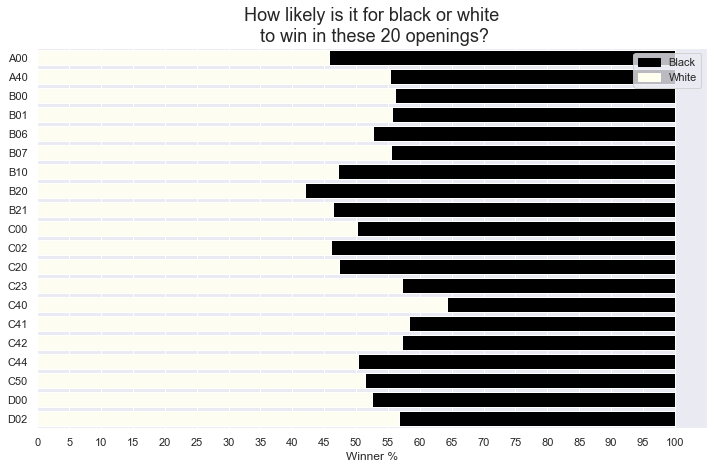

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import numpy as np

# adjust the plot theme and size
sns.set_theme()
plt.figure(figsize=(12, 7))

# The black wins bar chart
bar1 = sns.barplot(x='Winner %', y='eco',  data=black, color='black')

# the white wins bar chart
bar2 = sns.barplot(x='Winner %', y='eco',  data=white, color='ivory')


# add title and remove unnecessary y label
plt.ylabel('')
plt.title('How likely is it for black or white\n to win in these 20 openings?', fontsize=18)

# adjust x ticks
plt.xticks(np.linspace(0, 100, num=21))

# add a legend
black_bar = mp.Patch(color='black', label='Black')
white_bar = mp.Patch(color='ivory', label='White')
plt.legend(handles=[black_bar, white_bar], loc='upper right')

plt.show()

### Correlation Between Openings and Player Ratings
This visualization we'll look at the relationship between opening type and player ranking. The visualization will illustrate whether top ranked players tend to use certain openings over others and uncover the trends that exist within these openings.

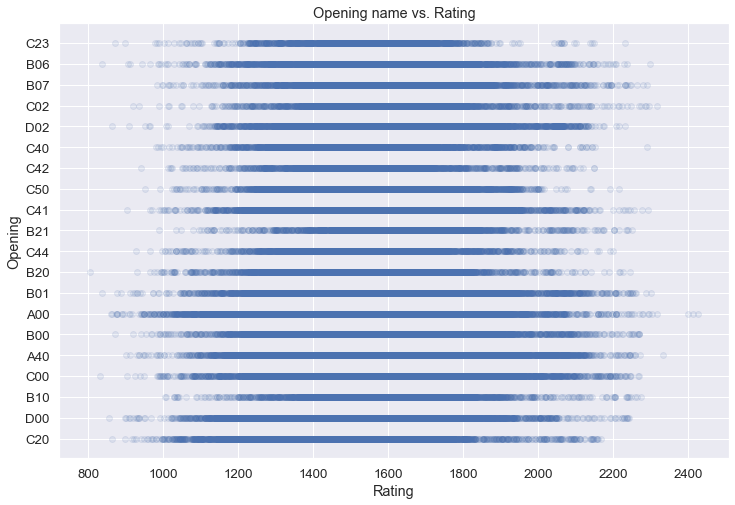

In [32]:
# set figure and font size.
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 8))

# get the rankings and opening names.
x = df_openings['white_elo'].astype(int)
y = df_openings['eco']

# plot the data together
plt.scatter(x, y, alpha=0.1)
plt.xlabel('Rating')
plt.ylabel('Opening')
plt.title('Opening name vs. Rating')

# show the plot.
plt.show()

The plot above tells us something that's not very surprising. The top 20 most common openings within this dataset are played by players of every caliber. Some openings deviate in average player rating a bit, but for the most part each opening is played by a wide range of different skill levels. So what about higher rated players? We can see that in 20 most common openings, the rating sort of tapers off past 2000. Let's look into the openings for players with ratings higher than or equal to 1800 to see if there's a discrepancy between these openings and the 20 most common openings from above:

In [33]:
# store results for plotting.
percentages = []
limits = []
num_games = []

for limit in range(1800, 2200, 10):

    # get the players that have a rating higher than limit
    high_rated_players_bool = df_game['white_elo'].astype(int) >= limit
    high_rated_players = df_game[high_rated_players_bool]

    # get top 20 for high rated players
    high_top_20 = get_top_20_openings(high_rated_players, 'eco')

    # Print top 20 openings for higher rated players to compare
    if limit == 1800:
        print(high_top_20, '\n')

    # filter out openings that are in the top 20
    high_only_openings = list(set(high_top_20).difference(top_20))

    # number of games where top 20 opening was used
    top20 = filter_data(high_rated_players, 'eco', 
                        high_top_20).shape[0]

    # number of games were an opening not in top 20 was used
    not_top20 = filter_data(high_rated_players, 'eco', 
                            high_only_openings).shape[0]

    # percentage of openings played not in the top 20
    percentages.append(not_top20/top20)
    limits.append(limit)
    num_games.append(not_top20)

# Print opening stats for ratings of 1800-1900
for i in range(10):
    print(f'For player rated {limits[i]}+, '
          f'percentage of non common openings is {percentages[i]:.3F}', \
          f'(total games = {num_games[i]}).')

# Print opening stats for ratings of 2100-2200
print('\n')
for i in range(10):
    print(f'For player rated {limits[-10+i]}+, ' \
          f'percentage of non common openings is {percentages[-10+i]:.3F}', \
          f'(total games = {num_games[-10+i]}).')

['A40', 'C00', 'B01', 'A00', 'B00', 'C41', 'D02', 'B07', 'D00', 'A43', 'A04', 'B06', 'D31', 'B21', 'B30', 'C50', 'B10', 'A02', 'B50', 'B02'] 

For player rated 1800+, percentage of non common openings is 0.210 (total games = 2638).
For player rated 1810+, percentage of non common openings is 0.212 (total games = 2463).
For player rated 1820+, percentage of non common openings is 0.216 (total games = 2311).
For player rated 1830+, percentage of non common openings is 0.220 (total games = 2166).
For player rated 1840+, percentage of non common openings is 0.247 (total games = 2254).
For player rated 1850+, percentage of non common openings is 0.253 (total games = 2138).
For player rated 1860+, percentage of non common openings is 0.255 (total games = 2003).
For player rated 1870+, percentage of non common openings is 0.258 (total games = 1874).
For player rated 1880+, percentage of non common openings is 0.262 (total games = 1756).
For player rated 1890+, percentage of non common opening

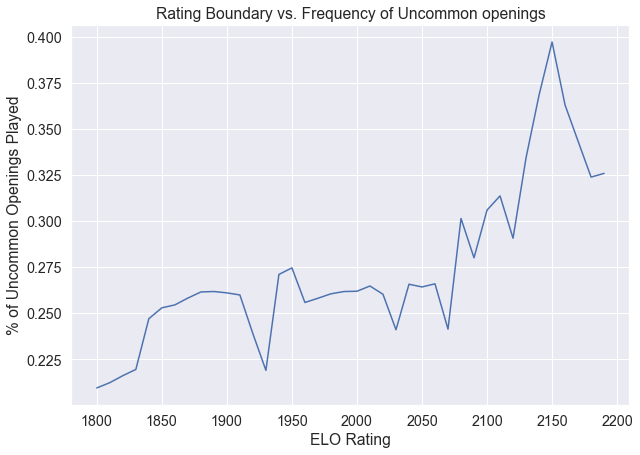

In [34]:
# set figure size and font
sns.set(font_scale=1.3)
plt.figure(figsize=(10, 7))

# plot the data together
plt.plot(limits, percentages)

# label the axis
plt.xlabel('ELO Rating')
plt.ylabel('% of Uncommon Openings Played')
plt.title('Rating Boundary vs. Frequency of Uncommon openings')

# show the plot
plt.show()

The plot validates our earlier hypothesis: that as the rating of a player increases, they tend to stray away from the most commonly player openings. That makes sense, why play commoner openings when you can play solid, tactically sound openings fit for the elite?

## Methods

This project utilizes `Logistic Regression`, `Random Forest Classifier`, and `K Nearest Neighbors` in order to determine who will win a game of chess. The team chose these algorithms because they are simple to implement and understand. `Logistic regression` is a binary classification model which tries to linearly separate the data by finding a decision boundary. This decision boundary maximizes the probability of a point belonging to one label given the existing. This regression technique also very efficient to train given the assumption that the data is linearly separable. This makes training the data faster than other algorithms. However, these assumptions are also the algorithm's biggest pitfall. If the data is not linearly separable, the model will not perform very well. Given that we were able to limit our classification to only binary behavior; however, this method seemed appropriate.

The next classification model is `KKN` or `K Nearest Neighbors Classifier`. `K Nearest Neighbors Classifier` estimates the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to. Distance is what determines how close a data point is to another. Scaling the data is important for a model that relies on distance to avoid the influence of different unit sizes. In our case, we will use principal component analysis that scales the data and removes multicollinearity. Multicollinearity is when some input variables are highly correlative with each other. The number of k neighbors will be determined by finding the point of diminishing returns, where increasing k increases accuracy by insignificant margins.

The final classification technique is `Random Forest Classifiers`. These classifiers classify elements by running a series of decision trees on a randomly selected subset of the data. It then aggregates the output of each individual tree to make a final classification. Running a series of decision tree allows for better classification, as it allows for the collective decision of the group to outweigh the error or misclassification in a single tree. This model works great for our application because it can use the feature set to make a series of decisions that will ultimately result in classifying whether black or white are the winner. Additionally, using a random forest classifier will mitigate the effects of outlier games.

Another method we used is `Linear Regression`. Linear regression is a statistical method that allows us to study the relationship between quantitative variables. By conducting a regression analysis, we're able to estimate a value given new data. In the context of our project, the regression allows us to determine the relationship between a chess game's features and predict the ELO of each player. We used this method because it's simple to interpret and is computationally efficient. Given that our current dataset has more than 100,000 samples, efficiency is crucial. This method suffers from drawbacks though. Outliers, an assumption of linearity, a vulnerability to multicollinearity, noise, and outliers are all factors that could affect the accuracy and predictive capabilities of our linear regression.

## Results

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion(y_true, y_pred, title):
    """Plots the confusion matrix for the predicted and true label
    
    Args:
        y_true (np.arrray): true label for the classification.
        y_pred (no.array): predicted label for the classification.
        title (str): title for the confusion matrix.
    """
    
    # set the font scale.
    sns.set(font_scale=1.2)

    # making a confusion matrix.
    conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)

    # plotting the matrix.
    conf_mat_disp = ConfusionMatrixDisplay(conf_mat, 
                                           display_labels=np.unique(y_true))
    conf_mat_disp.plot(cmap='pink')

    # set dimensions and look.
    plt.title(title)
    plt.gcf().set_size_inches(7, 7)
    plt.grid(False)

In [31]:
from sklearn.model_selection import StratifiedKFold

def cross_validate(model, x, y_true, splits=10):
    """Performs cross validation for the given dataset and model.
    
    Args:
        model (sklearn.model): model for the prediction.
        x (np.array): input data for the model.
        y_true (np.array): target data for the model.
        splits (int): number of k folds for the CV.
    
    Returns:
        y_pred (np.array): the prediction from the model.
    """
     
    # sets the number of folds.
    k_fold = StratifiedKFold(n_splits=splits)
    y_pred = np.empty_like(y_true)    
    
    # cross validate the data.
    for train_idx, test_idx in k_fold.split(x, y_true):
    
        # get the trainning split.
        x_train = x[train_idx, :]
        y_train = y_true[train_idx]
        x_test = x[test_idx, :]

        # predict the data.
        model.fit(x_train, y_train)
        y_pred[test_idx] = model.predict(x_test)
    
    return y_pred

In [32]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import)
        idx = idx[::-1]
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = [feat_import[_idx] for _idx in idx]
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit][::-1]
        feat_import = feat_import[:limit][::-1]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')

In [33]:
from sklearn.decomposition import PCA

def pca_fit(x):
    """Perfomrs principal component analysis if the data.
    
    Args:
        x (np.array): input data for a model. 
    
    Returns:
        x_pca (np.array): the data after applying PCA. 
    """
    
    # apply principle component analysis
    pca = PCA(whiten=True)
    pca.fit(x)
    x_pca = pca.transform(x)
    
    return x_pca

### Logistic Regression

Below you can see the logsitc regression and the results from this model. The model normalizes the data to permit the analysis of the feature importances.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# get the label and features.
X = df_games.drop(labels=['winner_binary'], axis=1)
y_true = df_games['winner_binary'].values

# scale the data.
scaler = StandardScaler()
x = scaler.fit_transform(X.values)

# create the model.
logistic = LogisticRegression(solver='lbfgs', max_iter=3000)

y_pred = cross_validate(logistic, x, y_true)

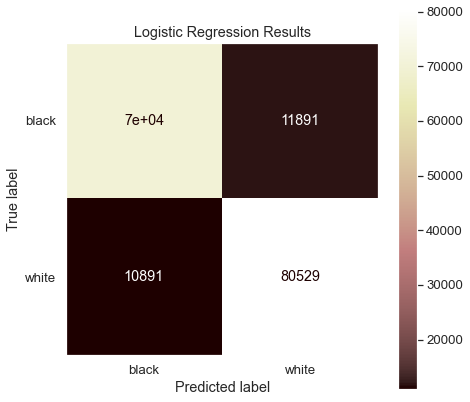

In [35]:
plot_confusion(y_true, y_pred, "Logistic Regression Results")

In [36]:
from sklearn.metrics import accuracy_score

# getting the accuracy of the model.
accuracy = accuracy_score(y_true, y_pred)
print(f'The Logistic model had a cross validated accuracy of {accuracy:.5f}.')

# getting the coefficients and column names. 
coefficients = logistic.coef_[0]
columns = np.array(df_games.columns)

# get the two most import features.
max1 = abs(coefficients).argmax()
max2 = abs(np.delete(coefficients, max1)).argmax()

# get the name for the features.
name1 = columns[max1]
name2 = np.delete(columns, max1)[max2]

print(f'The two most important features where {name1} and {name2}.')

The Logistic model had a cross validated accuracy of 0.86862.
The two most important features where captured_score_for_black and captured_score_for_white.


Now we will retrain the same model using only the black and white ELO and we will plot a decision boundary for the results. The main goal of this is to visualize the logistic regression and the decision boundary. Since the dataset has more than 17000 samples, we sample 1000 samples from the datset for the plot. 

In [37]:
# get the black and white elo
feats = [name1, name2]
x = df_g[feats].values

y_pred = cross_validate(logistic, x, y_true)

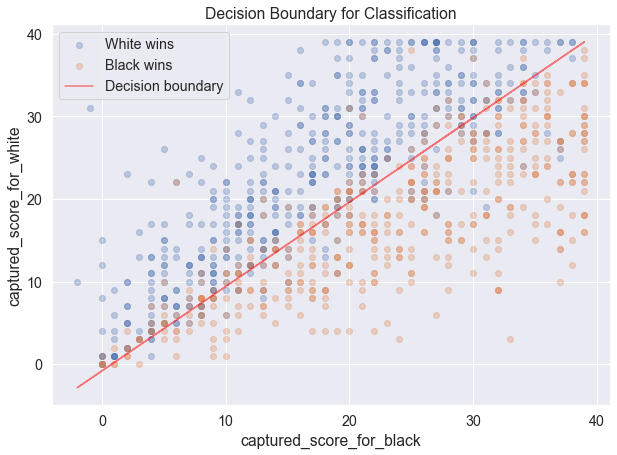

In [38]:
# sample 1000 points
samples = df_g.sample(n=1000, random_state=1)

# set the size and fot for the plot.
sns.set(font_scale=1.3)
plt.figure(figsize=(10, 7))

# plot the data.
for winner in ['white', 'black']:
    
    # get all the games where one color wins.
    df_bool = samples['winner_binary'] == winner
    x_winner = samples[df_bool]
    
    # get the ELO for each player.
    x1 = x_winner[name1].astype(int)
    x2 = x_winner[name2].astype(int)
    
    # plot the ELO.
    plt.scatter(x1, x2, label=f'{winner.title()} wins', alpha=0.3)

# get the bayes descision boundary. 
coef = logistic.coef_[0]
y = samples[name2].astype(int).values
x_db = samples[name1].astype(int).values
y_db = ((-x_db * coef[0]) - logistic.intercept_) / (coef[1])

# plot the decision line.
plt.plot(x_db, y_db, color='red', alpha=0.5, label='Decision boundary')
    
# set axis labels and title.
plt.title('Decision Boundary for Classification')
plt.xlabel(name1)
plt.ylabel(name2)
plt.legend()
plt.show()

### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

# define splits and max ddepth
n_splits = 10
max_depth = 5

# extract data from dataframe
y_true = df_games['winner_binary'].values
x = df_games.drop(labels=['winner_binary'], axis=1).values

# init random forest
rf_clf = RandomForestClassifier()

# cross validate the data and make a prediction.
y_pred = cross_validate(rf_clf, x, y_true, splits=10)

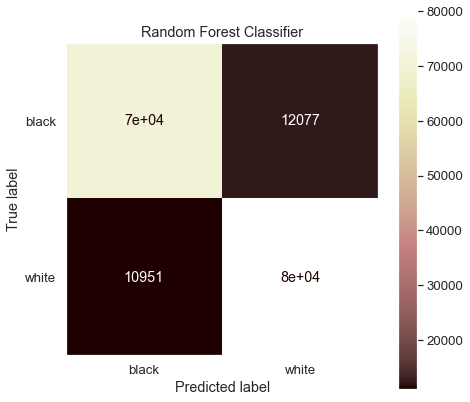

In [40]:
plot_confusion(y_true, y_pred, "Random Forest Classifier")

In [41]:
# getting the accuracy of the model.
accuracy = accuracy_score(y_true, y_pred)
print(f'The Random Forest Classifier has a cross validated accuracy of {accuracy:.5f}.')

The Random Forest Classifier had a cross validated accuracy of 0.86720.


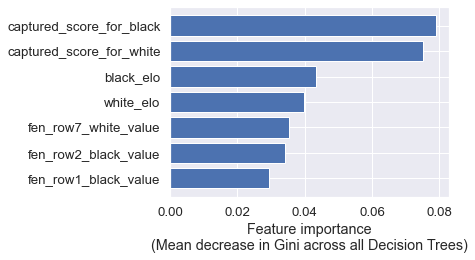

In [42]:
# get the input feature names.
x_feats = list(df_games.drop(labels=['winner_binary'], axis=1).columns)

# plot the feature importance.
plot_feat_import(x_feats, rf_clf.feature_importances_, limit = 7)

### K Nearest Neighbors

Below you can see the k nearest neighbors classifier and the results from this model. The model uses principle component analysis to scale the data and remove multicollinearity. The trainning and testing time for the model over one hour long. Hence, when optimizing the number of k neighbors, we train and tested in a smaller sample.

In [43]:
from sklearn.decomposition import PCA

# sample 8500 points
samples = df_games.sample(n=8500, random_state=1)

# define the x and y features
y_true = samples['winner_binary'].values
x = samples.drop(labels=['winner_binary'], axis=1).values

# apply principle component analysis
x = pca_fit(x)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# record the score and the number of neighbors.
best_k = {}

for k in range(1, 251):
    # initialize a knn_classifier.
    knn = KNeighborsClassifier(n_neighbors=k)

    # cross validate and make a prediction.
    y_pred = cross_validate(knn, x, y_true)
    
    # store results.
    best_k[k] = accuracy_score(y_true, y_pred)

Plot the accuracy scores of each k and compare the scores in order to define the k that optimizes the model. We are looking for the point where the accuracy stops growing. Graphically, this looks like a curve with a plateau or when we start to see minimal improvements in accuracy.

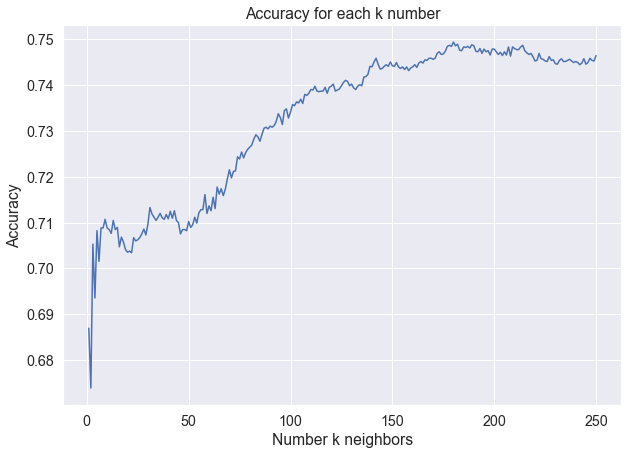

Best number of Neighbors: 180 with an accuracy of 0.7494117647058823


In [45]:
# set figure size and font
sns.set(font_scale=1.3)
plt.figure(figsize=(10, 7))

# plot the data together
plt.plot(best_k.keys(), best_k.values())

# label the axis
plt.xlabel('Number k neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for each k number')

# show the plot
plt.show()

# get the K neighbors with highest accuracy.
max_key = max(best_k, key=best_k.get)
print(f'Best number of Neighbors: {max_key} ' \
      f'with an accuracy of {best_k[max_key]}')

In [46]:
# define the x and y features for the entire dataset.
y_true = df_games['winner_binary'].values
x = df_games.drop(labels=['winner_binary'], axis=1).values

# apply principle component analysis.
x_pca = pca_fit(x)

In [47]:
# initialize a knn_classifier.
model_knn = KNeighborsClassifier(n_neighbors=max_key)

# cross valuda the data.
y_pred = cross_validate(model_knn, x_pca, y_true)

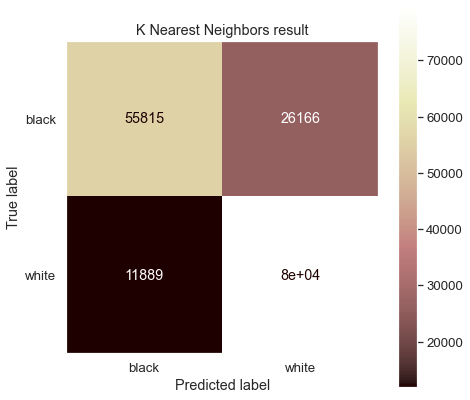

In [48]:
plot_confusion(y_true, y_pred, "K Nearest Neighbors result")

In [49]:
# getting the accuracy of the model.
accuracy = accuracy_score(y_true, y_pred)
print(f'The knn model has a cross validated accuracy of {accuracy:.5f}.')

The knn model had a cross validated accuracy of 0.78054.


### Linear Regression

Next up is our linear regression. The goal of this linear regression is to predict the ELO rating of black and given a game.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def regression_model(df, x_feat_list, y_feat, verbose=True):
    """ Computes a linear regression model on the given data.

    Args:
        df (pd.DataFrame): data for the model.
        x_feat_list (list): list of all features in model.
        y_feat (str): target feature.
        verbose (bool): toggles command line output.

    Returns:
        reg (LinearRegression): model fit to data.
    """
    # initialize regression object
    reg = LinearRegression()

    # get target variable
    x = df.loc[:, x_feat_list].values
    y = df.loc[:, y_feat].values

    # fit regression
    reg.fit(x, y)

    # compute / store r2
    y_pred = reg.predict(x)

    if verbose:

        # compute / print r2
        r2 = r2_score(y_true=y, y_pred=y_pred)
        print(f'r2 = {r2:.3}')

    return reg

In [36]:
def run_regression_model(df, color):
    """ Use regression model function to predict ELO for specified color.

    Args:
        df: dataframe which to analyze
        color (str): which color's rating to predict.
    Returns:
        linear regression model along with r^2 score.
    """
    y_feat = color
    elo = ['white_elo', 'black_elo']
    x_feat_list = df.drop(labels=elo , axis=1).columns

    regression_model(df, x_feat_list, y_feat)

In [38]:
# Change winner column back into 1's and 0's for regression
map_win = {'black': 1, 'white': 0}
df_games['winner_binary'] = df_games['winner_binary'].replace(map_win)

print("Computed r^2 Score from White's Linear Regression Model:")
run_regression_model(df_games, 'white_elo')
print("Computed r^2 Score From Black's Linear Regression Model:")
run_regression_model(df_games, 'black_elo')

Computed r^2 Score from White's Linear Regression Model:
r2 = 0.174
Computed r^2 Score From Black's Linear Regression Model:
r2 = 0.186


## Disscusion

The main objective of this project was to see how accurately we were able to predict the outcome of chess game given some data. This project demonstrates that given the player ELO, opening, game type, termination and FEN positions we were able to predict the outcome of a game about 80-85% of the time across all the classification models. This accuracy was expected since the team believed that most of the player's skill/ability is captured in the player ELO and a game's outcome can be heavily implied by its capture scores. Hence, by using the ELO and capture score and other supporting information, our models should be able to predict the result of a match at least half of the time. We also get further confirmation that the capture score and ELOs were the most important features from the `Logistic Regression` and `Random Forest Classiefiers`. the `Logistic Regression` and `Random Forest Classiefiers`both scored around 87% accuracy. The `K Nearest Neighbors` performed a bit worse than the `Logistic Regression` and `Random Forest Classiefiers` scoring around 78%, but still seems to be a relatively powerful predictor. Unfortunately, the  `Linear Regression` model did not perform well with an insignificant r2 score below 0.2 for both Black ElO and White ELO. This isn't surprising though. Material count, number of moves, and the winner of a game won't tell you the skill level of a player. What goes on in that game, the moves played throughout the game, the tactics and thought process behind each move are what display true skill, but unfortunately, these things are hard to quantify. Chess is a very complex game with so many intricacies and facets, and for that reason, no mix of capture scores, moves, or game type will be able to quantify a player's talent.


### Shortcomings

There are some problems with our models and their ability to predict chess games. Here are just some:
- The models don't account for draws. Draws are fairly common in chess, and our data doesn't have any drawn games. The Classification models are essentially blind to the very possibility of a draw.

- Some variables are produced after the game. The capture and fen scores are calculated after the game, meaning you can't make a prediction until the game is midway. At that point, you'll already see who's won. These models, especially our classification models, aren't valuable if you can only predict the outcome of a game after the outcome has already been decided.

- Most of the variables have little to no correlation with output variables. Apart from the capture scores, many of the variables aren't really useful for predicting who would win.

- Our models took a loooooong time to run. Our models require so much computing and so much time, and we were only able to parse through 180k games. How useful would these models be in parsing 2.5 million games?



### Takeaway

There are no chess openings that are clearly more advantageous compared to others. The openings didn't play a significant role in predicting who would win. The fact that we still see a variety of openings in chess tournaments suggests that there is no clear best opening; otherwise, everyone would just play the same opening.
Elo is generally a good predictor of who would win since it represents a player's record. If you have an Elo score of 1500, that means you have, more often than not, beat players below 1500. If you want to predict the outcome of chess games, your best bet is on Elo.
It's generally pretty difficult to predict what will happen in chess. Looking at the beginning or end of a game will never be enough to paint you a full picture.

Overall, we absolutely do not recommend using our models in any way whatsoever. Aside from the fact that you'd probably never have to use our models in the first place, due to its significant issues, the computing power needed, the strict type of information you'd need about a game, and in general the lackluster results, it would probably be best to stick to your gut on who'll win and pay attention to the actual game to understand the skill level of both players.